In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv(r'C:\Users\Dell\Downloads\TensorFlow_FILES\DATA\lending_club_info.csv',index_col = 'LoanStatNew')

In [6]:
data.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [47]:
def feat_info(col_name):
    print(data.loc[col_name]['Description'])

In [48]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [17]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\TensorFlow_FILES\DATA\lending_club_loan_two.csv')

In [18]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [23]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# EDA

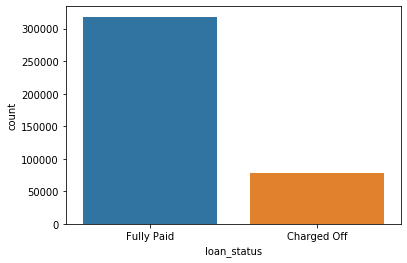

In [26]:
sns.countplot(x = 'loan_status' ,data = df)

In [27]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

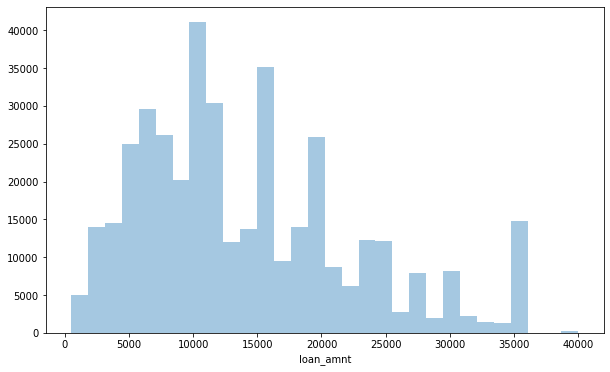

In [36]:
plt.figure(figsize = (10,6))
sns.distplot(df['loan_amnt'], kde = False,bins = 30)

In [33]:
df['loan_amnt'].max()

40000.0

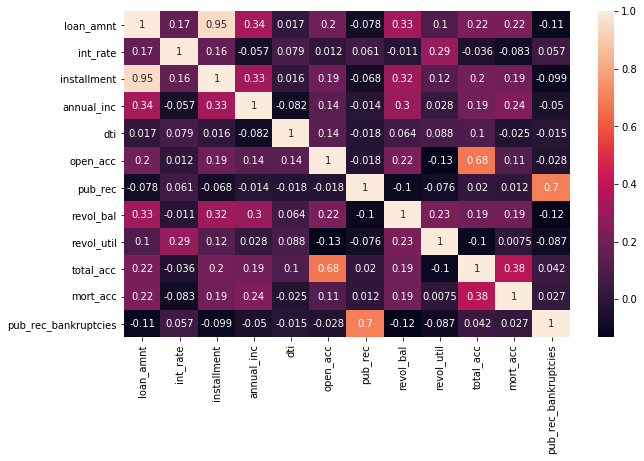

In [40]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)

In [41]:
feat_info('pub_rec')

Number of derogatory public records


In [42]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [194]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


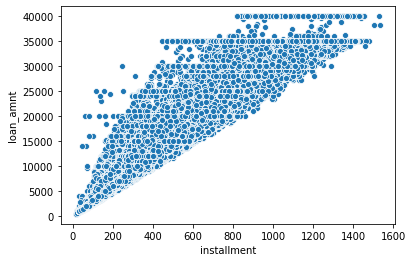

In [44]:
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

In [51]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [52]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

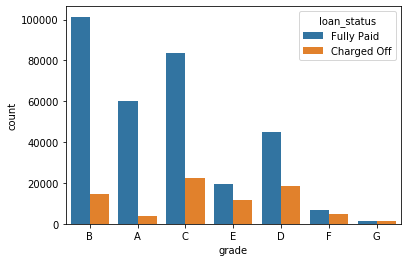

In [54]:
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

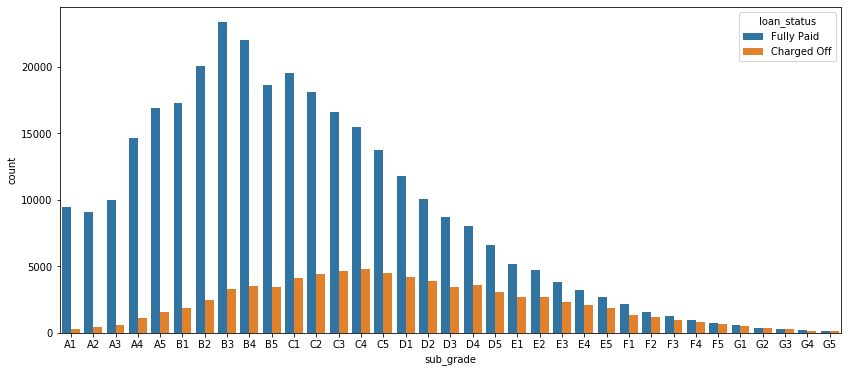

In [60]:
plt.figure(figsize = (14,6))
df_sorted = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df,order = df_sorted, hue = 'loan_status')

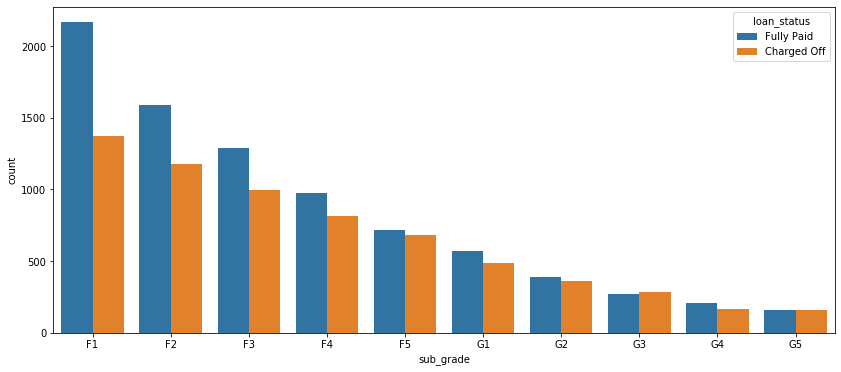

In [62]:
# f and g subgrades dont get paid often. so extract that and perform count plot
f_and_g = df[(df['grade'] == 'F')  | (df['grade'] == 'G') ]
plt.figure(figsize = (14,6))
df_sorted = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = f_and_g,order = df_sorted, hue = 'loan_status')

In [58]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [63]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [65]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


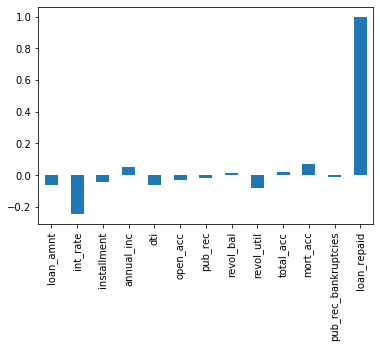

In [69]:
df.corr()['loan_repaid'].plot(kind = 'bar')

# Data Preprocessing

In [70]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [71]:
len(df)

396030

In [72]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [73]:
df.select_dtypes(include = np.number).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid'],
      dtype='object')

In [74]:
df.select_dtypes(include = 'object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [105]:
df = df.drop(['emp_title','title'], axis = 1)

In [106]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [107]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [108]:
emp_len = emp_co/emp_fp

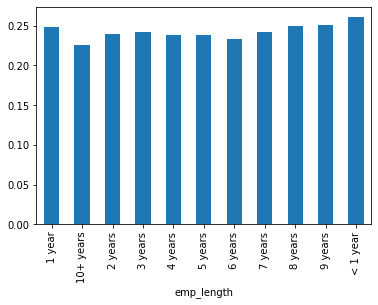

In [110]:
emp_len.plot(kind = 'bar')

In [111]:
df = df.drop('emp_length', axis = 1)

In [112]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

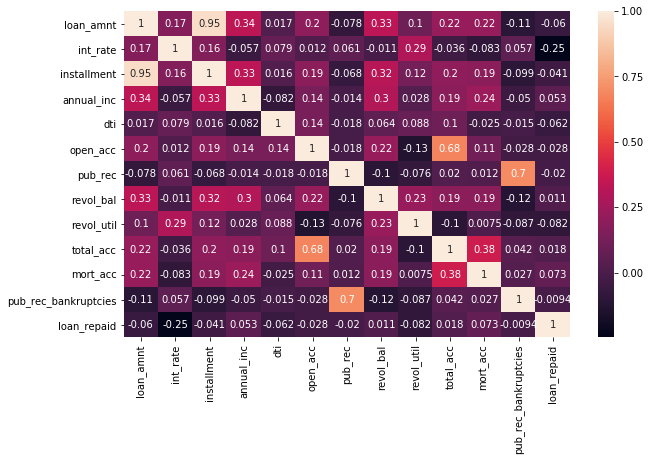

In [114]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)

In [119]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [121]:
total_acc_avg[2.0]

0.0

In [122]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [123]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [124]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [125]:
df = df.drop(['revol_util','pub_rec_bankruptcies'], axis = 1)

In [126]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'address', 'loan_repaid'],
      dtype='object')

In [146]:
df = df.drop('grade', axis = 1) # since grade and subgrade are the same

In [147]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [148]:
df = pd.concat([df.drop('sub_grade',axis = 1),subgrade_dummies],axis = 1)

In [149]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [150]:
# get dummies for other categorical columns
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [151]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [153]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)# replace none, any to other and get dummies

In [155]:
# extract zipcode from address and get dummies for zip code
df['zip_code'] = df['address'].apply(lambda address : address[-5:0])
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [156]:
feat_info('issue_d')

The month which the loan was funded


In [157]:
df = df.drop('issue_d',axis=1)  # because we wouldnt know beforehand if the loan would be issued..causes data leakage

In [158]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [165]:
#df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x : x[-4:])

In [161]:
df = df.drop('earliest_cr_line', axis = 1)

In [162]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_year'], dtype='object')

In [199]:
df['earliest_cr_year'] = pd.to_numeric(df['earliest_cr_year'])

In [200]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [166]:
df = df.drop('loan_status', axis = 1)

# Train test split

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Pre-processing

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
scaler = MinMaxScaler()

In [174]:
X_train = scaler.fit_transform(X_train)

In [175]:
X_test = scaler.transform(X_test)

# Model Creation 

In [176]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [177]:
df.shape

(396030, 68)

In [207]:
model = Sequential()


# input layer
model.add(Dense(68,  activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(34, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [208]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=30,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316824 samples, validate on 79206 samples
Epoch 1/30
316824/316824 [==============================] - 5s 17us/sample - loss: 0.4934 - val_loss: 0.4586
Epoch 2/30
316824/316824 [==============================] - 5s 15us/sample - loss: 0.4691 - val_loss: 0.4572
Epoch 3/30
316824/316824 [==============================] - 6s 19us/sample - loss: 0.4650 - val_loss: 0.4581
Epoch 4/30
316824/316824 [==============================] - 5s 16us/sample - loss: 0.4637 - val_loss: 0.4584
Epoch 5/30
316824/316824 [==============================] - 5s 15us/sample - loss: 0.4627 - val_loss: 0.4572
Epoch 6/30
316824/316824 [==============================] - 6s 17us/sample - loss: 0.4625 - val_loss: 0.4568
Epoch 7/30
316824/316824 [==============================] - 6s 18us/sample - loss: 0.4619 - val_loss: 0.4560
Epoch 8/30
316824/316824 [==============================] - 5s 16us/sample - loss: 0.4614 - val_loss: 0.4568
Epoch 9/30
316824/316824 [==============================] - 5s 15us/sample - 

In [202]:
losses = pd.DataFrame(model.history.history)

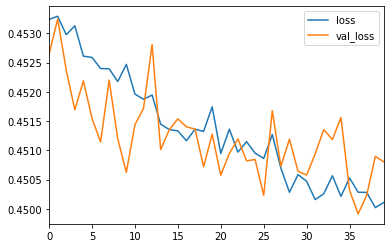

In [203]:
losses[['loss','val_loss']].plot()

# Model Evaluation

In [182]:
from sklearn.metrics import classification_report,confusion_matrix

In [204]:
predictions = model.predict_classes(X_test)

In [205]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.01      0.03     15493
           1       0.81      1.00      0.89     63713

    accuracy                           0.81     79206
   macro avg       0.69      0.51      0.46     79206
weighted avg       0.76      0.81      0.72     79206



In [206]:
print(confusion_matrix(y_test,predictions))

[[  228 15265]
 [  175 63538]]
